In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

# import load_iris function from datasets module
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline

pd.set_option('display.max_columns', 40)

# EDA Problem Set 6
**Submitted by: Rosiel Jazmine T. Villareal**

## Requirements

Using the lessons on Perceptrons using Scikit-learn, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many classes of Iris flowers are there in the dataset? ( 1pt )

2. What are the variances per feature of the dataset ( 3pts )

3. Build a classifier for the Iris dataset. (6 pts)




-----


Bonus 1 : Who will win in the UAAP finals? (1pt)
 
----

In [2]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
len(df)

150

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


## 1. How many classes of Iris flowers are there in the dataset?

In [7]:
df['target'].value_counts()

0.0    50
2.0    50
1.0    50
Name: target, dtype: int64

There are 3 classes of Iris flowers in the dataset, namely, Iris-Setosa, Iris-Versicolour, Iris-Virginica; each represented by 50 samples.

In [8]:
df.groupby('target').describe()

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0.0                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1.0                 50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2.0                 50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)                                                \
                  count   mean       std  min    25%  50%    75%  max   
target                                                                  
0.0                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
1.0                50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
2.0                50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

       petal length (cm)                                               \
                   count   mean       std  min  25%   50%    75%  max   
target                                                                  
0.0                 50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
1.0                 50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
2.0                 50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

       petal width (cm)                                            
                  count   mean       std  min  25%  50%  75%  max  
target                                                             
0.0                50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1.0                50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2.0                50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

## 2. What are the variances per feature of the dataset?

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
for feat in df.columns:
    print(f'Feature: {feat}')
    print(f'Variance:{df[feat].var()}\n')

Feature: sepal length (cm)
Variance:0.6856935123042507

Feature: sepal width (cm)
Variance:0.189979418344519

Feature: petal length (cm)
Variance:3.116277852348993

Feature: petal width (cm)
Variance:0.5810062639821029

Feature: target
Variance:0.6711409395973155



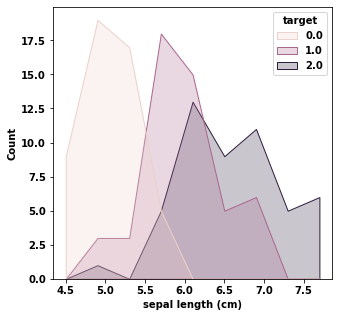

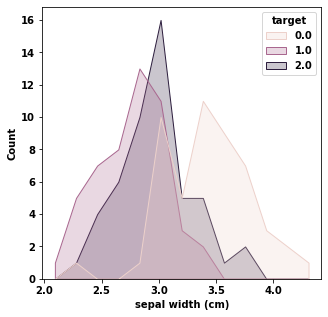

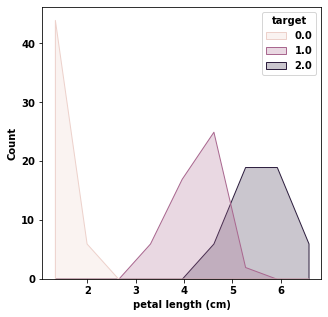

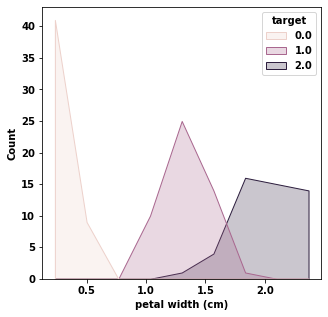

<Figure size 360x360 with 0 Axes>

In [12]:
# Feature histplots

for feat in df.columns:
    plt.figure(feat, figsize=(5,5))
    plt.tight_layout()
    if feat != 'target':
        ax = sns.histplot(x=df[feat], hue=df['target'], element='poly')

From the feature histogram plots above, it seems like the 3 Iris classes are more separable when using the features ``petal length (cm)`` and ``petal width (cm)``. Particularly, **class 0** is well separated from **classes 1 and 2** with samples that belong to it having lower petal lengths and widths.

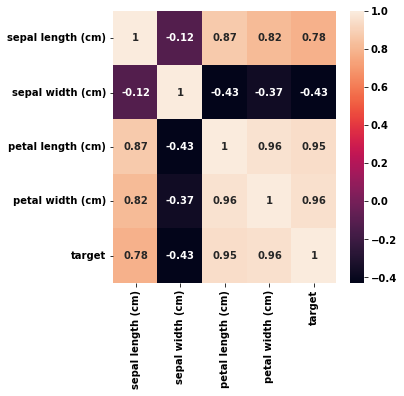

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(df.corr(), annot=True)

Based on the heatmap with correlation values above, ``petal length (cm)`` and ``petal width (cm)`` are highly correlated with each other (corr=0.96). Similarly, ``petal length (cm)`` and ``sepal length (cm)`` are also highly correlated (0.87). The features ``petal length (cm)`` and ``petal width (cm)`` have high correlation values with the ``target`` (0.95 and 0.96, respectively). This was shown in the feature histogram plots earlier, where samples in **class 2** have higher petal lengths and widths than those in **classes 1 and 2**; and samples in **class 1** have higher petal lengths and widths than those in **class 0**. 

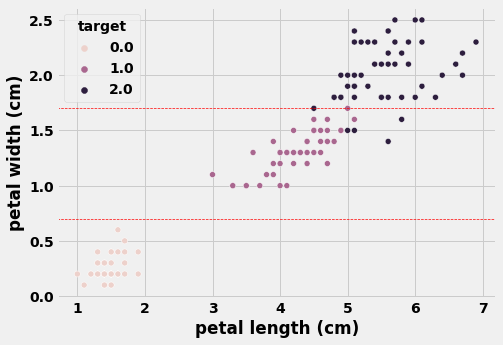

In [14]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=df)
ax.axhline(y=0.7, ls='--', c='r', lw=0.7)
ax.axhline(y=1.7, ls='--', c='r', lw=0.7)
plt.show()

Plotting the observations in the space of the 2 features that are highly correlated with the target ``petal length (cm)`` and ``petal width (cm)`` we can see that the 3 classes can somehow be separated using lines.

## 3. Build a classifier for the Iris dataset.

Using __[sklearn's linear perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)__ on all the features in the Iris dataset...

In [15]:
# Set features as X & target variable as y
X = df.drop('target', axis=1)
y = df['target']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Split into 70% train - 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.3,
                                                   random_state=18)

In [16]:
# Fit on train set
clf = Perceptron(random_state=18,
                 early_stopping=True, # stop training if validation score not improving
                 validation_fraction=0.2, # portion to assign to validation
                 penalty='l2', # regularization term - sum of squared weights
                 max_iter=10, # no. of epochs to train & validate
                 alpha=0.0001) # regularization term multiplier
clf.fit(X_train, y_train)

Perceptron(early_stopping=True, max_iter=10, penalty='l2', random_state=18,
           validation_fraction=0.2)

In [17]:
# Predict & evaluate metrics on test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.92      0.92      0.92        13
         2.0       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



The perceptron model has an accuracy of 96%, macro avg f1-score of 95%, and weighted avg f1-score of 96% on the test set.

In [18]:
clf.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': True,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 10,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 18,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.2,
 'verbose': 0,
 'warm_start': False}

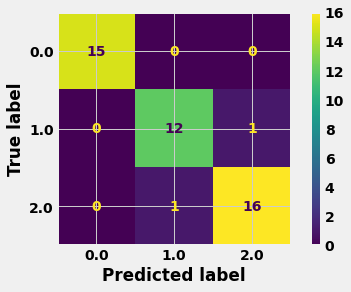

In [19]:
plot_confusion_matrix(clf, X_test, y_test)

The perceptron model only misclassified two observations in the test set.

In [20]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [21]:
pd.DataFrame(clf.coef_, columns=X.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.874003,1.866787,-1.596102,-1.510359
1,2.123562,-2.072149,1.449227,-1.553342
2,0.170852,-0.232298,4.309946,5.836062


Notes on feature coefficients:
1. Class 2 has high feature coefficients for ``petal length (cm)`` (**4.309946**) & ``petal width (cm)`` (**5.836062**). The weights assigned by the perceptron model match with the feature histplots and correlation heatmap earlier, where we saw that observations belonging to class 2 have higher values for these features.
2. Similarly, class 0 has a high feature coefficient for ``sepal width (cm)`` (**1.866787**), matching the feature histplot where observations from class 0 have higher values for this feature. 

In [22]:
preds = clf.predict(X_scaled)
df['pred'] = preds
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
0,5.1,3.5,1.4,0.2,0.0,0.0
1,4.9,3.0,1.4,0.2,0.0,0.0
2,4.7,3.2,1.3,0.2,0.0,0.0
3,4.6,3.1,1.5,0.2,0.0,0.0
4,5.0,3.6,1.4,0.2,0.0,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,2.0
146,6.3,2.5,5.0,1.9,2.0,2.0
147,6.5,3.0,5.2,2.0,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0,2.0


## Bonus 1 : Who will win in the UAAP finals?
Ateneo will win!!! #4Peat #TabBaldWIN #BEBOB